# Introduction

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. The links to the two datasets are below:

Exit surveys from employees of the Department of Education, Training and Employment (DETE):
> https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/distribution/dist-qld-95db4f3d-9857-4666-b82b-bd09aaf6dd70/details?q=exit%20survey

Exit surveys from employees of the Technical and Further Education (TAFE) institute:
> https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey

With these datasets, we'll play the role of a data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Below is a preview of a few columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a few columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

Let's get to it!

In [172]:
# import pandas and numpy
import numpy as np
import pandas as pd

# run the following jupyter magic to make graphs appear inline
%matplotlib inline

# read in the surveys into dataframes
dete_survey = pd.read_csv("dete-exit-survey-january-2014.csv",na_values='Not Stated')
tafe_survey = pd.read_csv("tafe-employee-exit-survey-access-database-december-2013.csv",encoding='windows-1252')

In [173]:
# let's do some high-level analysis of the dete_survey 
## seeing the datatypes and amount of records, a sample of records, and how many nulls
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [174]:
## seeing a sample of records
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [175]:
## seeing how many nulls
dete_survey.isnull().sum().sort_values(ascending=False)

Torres Strait                          819
South Sea                              815
Aboriginal                             806
Disability                             799
NESB                                   790
Business Unit                          696
Classification                         367
Region                                 105
Role Start Date                         98
Opportunities for promotion             87
Career Aspirations                      76
DETE Start Date                         73
Wellness programs                       56
Coach                                   55
Further PD                              54
Cease Date                              34
Workplace issue                         34
Feedback                                30
Health & Safety                         29
Gender                                  24
Professional Development                14
Stress and pressure support             12
Skills                                  11
Age        

# DETE Survey High-Level Data Analysis

From looking at a sample of records from the DETE Survey, I found the following:
- Number of entries: 822
- Number of columns: 56
- Columns with over 100 null values (# of nulls in parentheses):
  - Torres Straight (819)
  - South Sea (815)
  - Aboriginal (806)
  - Disability (799)
  - NESB (790)
  - Business Unit (696)
  - Classification (367)
  
Though I'm curious how we should go and clean the above columns with greater than 100 null values, we really only care about the following columns to aid us in answering the above questions:
- ID (no nulls)
- SeparationType (no nulls)
- Cease Date (no nulls)
- DETE Start Date (no nulls)
- Age (11 nulls)

It looks like, in the DETE survey, all of the rows have data in the appropriate columns instead of Age which will be needed to answer our second question in the first cell above. Since less than 2% of the data is missing an Age, we might be okay with ignoring those rows when answering the second question.

Now that we have looked into the DETE survey at a high level, let's look into the TAFE survey.

In [176]:
# let's do some high-level analysis of the tafe_survey 
## seeing the datatypes and amount of records, a sample of records, and how many nulls
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

In [177]:
## seeing a sample of records
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,634133009996094000,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 – 30,Temporary Full-time,Administration (AO),1-2,1-2
1,634133654064531000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,634138845606563000,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,634139903350000000,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,634146578511788000,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 – 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [178]:
## seeing how many nulls
tafe_survey.isnull().sum().sort_values(ascending=False)

Main Factor.     Which of these was the main factor for leaving?                                                                                                 589
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                                                                    270
Contributing Factors. Ill Health                                                                                                                                 265
Contributing Factors. Maternity/Family                                                                                                                           265
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributing Factors. NONE                                                                                                                                       265
Contributi

# TAFE Survey High-Level Data Analysis

From looking at a sample of records from the DETE Survey, I found the following:
- Number of entries: 702
- Number of columns: 72
- Columns that we care about as mentioned above and # of nulls in parentheses:
  - Record ID (no nulls)
  - Reason for ceasing employment (1)
  - LengthofServiceOverall. Overall Length of Service at Institute (in years) (106)
  - CurrentAge (106)

It looks like, in the TAFE survey, except for one stray row, all survey participants entered in their reason for leaving. However, there are over 100 nulls for their lenght of service with the company and age, accounting for roughly 15% of the data if these 106 rows have both the Age and LenghthofServiceOverall column missing. We'll need to look into this more on how to clean this up.

In [179]:
# In the TAFE Survey, check if the CurrentAge and LengthofServiceOverall being null are on the same rows
tafe_survey[tafe_survey["LengthofServiceOverall. Overall Length of Service at Institute (in years)"].isnull()]["CurrentAge. \xa0\xa0\xa0\xa0Current Age"].notnull().sum()

0

From the above, the age is blank for those where the Length of Service Overall is blank as well, so there are only 106 rows that we need to worry about cleaning up. Before we do that, let's go ahead and drop the columns from the DETE Survey that won't aid our analysis.

In [180]:
# Drop the non-needed columns from the DETE Survey
dete_survey_updated = dete_survey.drop(columns=dete_survey.columns[28:49],axis=1)

Now let's drop the other columns from the TAFE Survey that won't aid our analysis.

In [181]:
# Drop the non-needed columns from the TAFE Survey
tafe_survey_updated = tafe_survey.drop(columns=tafe_survey.columns[17:66],axis=1)

Now, let's clean up the names of the columns that we are analyzing to make them uniform and easier to work with. This will help us with combining the two datasets as well. I will use the following criteria in renaming the columns:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

Let's start with formatting the DETE survey columns first.

In [182]:
# reformat the columns of the DETE survey
dete_survey_updated.columns =  dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')

Now that we have reformated the column names of the DETE survey, let's rename the columns in the TAFE survey to line up with the DETE survey column names.

In [183]:
# create a mapping of the new column names
col_mapping = {
                'Record ID': 'id',
                'CESSATION YEAR': 'cease_date',
                'Reason for ceasing employment': 'separationtype',
                'Gender. \xa0\xa0\xa0\xa0What is your Gender?': 'gender',
                'CurrentAge. \xa0\xa0\xa0\xa0Current Age': 'age',
                'Employment Type. \xa0\xa0\xa0\xa0Employment Type': 'employment_status',
                'Classification. \xa0\xa0\xa0\xa0Classification': 'position',
                'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
              }

tafe_survey_updated = tafe_survey_updated.rename(mapper=col_mapping,axis='columns')

Now that we have renamed our necessary columns, let's remove more data that we don't need to help us get to the bottom of the following prompt:

"Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?"

To answer this question, we want to look at those who resigned only. In the "separationtype" column, we have the following values state a resignation. Let's see the different separationtypes in each dataset to see which ones state something along the lines of a resignation.

In [184]:
# Looking at the distinct values of separation type in the TAFE survey
tafe_survey_updated["separationtype"].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [185]:
# Looking at the distinct values of separation type in the DETE survey
dete_survey_updated["separationtype"].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

From looking at the distinct values between the two datasets, we found the following related to "Resignation":

DETE Survey separationtype values related to "Resignation:"
- Resignation-Other reasons
- Resignation-Other employer
- Resignation-Move overseas/interstate

TAFE Survey separation type value related to "Resignation": Resignation

Now that we know which values to look for, let's filter our datasets down to the separation types of these values.

In [186]:
# filter the DETE survey to the resingation values above
# NOTE: We're going to use the copy function to avoid a SettingWithCopyWarning
dete_resignations_precopy = dete_survey_updated[dete_survey_updated["separationtype"].isin(['Resignation-Other reasons','Resignation-Other employer','Resignation-Move overseas/interstate'])]
dete_resignations = dete_resignations_precopy.copy()

In [187]:
# validate that there are less rows in the dete_resignations dataset than the main one, indicating that our filters were working correctly
dete_resignations.shape

(311, 35)

In [188]:
# validate that the distinct values of separationtype only deal with "Resignation", indicating that our filters were working correctly
dete_resignations["separationtype"].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

Now that we have made a dataset for the DETE survey where the separationtype relates to a resignation, let's do the same for the TAFE survey

In [189]:
# filter the TAFE survey to the resingation values above
tafe_resignations = tafe_survey_updated[tafe_survey_updated["separationtype"]=='Resignation']

In [190]:
# validate that there are less rows in the dete_resignations dataset than the main one, indicating that our filters were working correctly
tafe_resignations.shape

(340, 23)

In [191]:
# validate that the distinct values of separationtype only deal with "Resignation", indicating that our filters were working correctly
tafe_resignations["separationtype"].value_counts()

Resignation    340
Name: separationtype, dtype: int64

Now that we have filtered down our datasets to the appropriate rows for analyzing resignations, let's look at the two datasets to make sure the dates that an individual started working and finished working make sense. Below are some considerations that we'll account for as we're looking at making sure these date fields' values make sense:
- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

We'll first look at the DETE survey dataset.

In [192]:
# check the cease_date field in the DETE survey to make sure the values make sense (per the above criteria)
dete_resignations["cease_date"].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

Nothing seems too out of the ordinary so far with the "cease_date" field. We'll just need to extract just the year from those rows that have a month and a year.

In [193]:
# Extract the year from "cease_date" where the date is in a MM/YYYY format
# also, turn it into a float
pattern = r"([1-2][0-9]{3})"
dete_resignations["cease_year"] = dete_resignations["cease_date"].str.extract(pattern).astype(float)

# verify that the cease_year column is a float
dete_resignations["cease_year"].dtype

dtype('float64')

In [194]:
# verify that we extracted the dates correctly
dete_resignations["cease_year"].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_year, dtype: int64

Now that cease year looks good, let's look at the start date in the DETE dataset.

In [195]:
# look at the distinct values of the start date in the DETE dataset
dete_resignations["dete_start_date"].value_counts().sort_index(ascending=True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
Name: dete_start_date, dtype: int64

No dates look out of the ordinary there, so I think we are good with making sure the years look good in the DETE survey. Let's now look at the year in the TAFE survey.

In [196]:
# verify that we extracted the dates correctly
tafe_resignations["cease_date"].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

No dates look out of the ordinary there as well, so I think we are good with making sure the years look good in the TAFE survey. 

Now, we'll need to create a new column in dete_resignations that calculates the number of years of service for a former employee, similar to the institute_service column in tafe_resignations. We'll use the following columns:

- dete_start_date: The year the person began employment with the DETE
- cease_year: The year or month the person's employment ended

In [197]:
# Create a new column calculating the institute_service for dete_resignations
dete_resignations["institute_service"] = dete_resignations["cease_year"] - dete_resignations["dete_start_date"]

# check the distinct values of dete_resignations' institute_service field
dete_resignations["institute_service"].value_counts().sort_index(ascending=True)

0.0     20
1.0     22
2.0     14
3.0     20
4.0     16
5.0     23
6.0     17
7.0     13
8.0      8
9.0     14
10.0     6
11.0     4
12.0     6
13.0     8
14.0     6
15.0     7
16.0     5
17.0     6
18.0     5
19.0     3
20.0     7
21.0     3
22.0     6
23.0     4
24.0     4
25.0     2
26.0     2
27.0     1
28.0     2
29.0     1
30.0     2
31.0     1
32.0     3
33.0     1
34.0     1
35.0     1
36.0     2
38.0     1
39.0     3
41.0     1
42.0     1
49.0     1
Name: institute_service, dtype: int64

Now that we have the years of service for each dataset, let's now look at those employees who were dissatisfied. Below are the columns we'll use to categorize employees as dissatisfied from each dataset:

- tafe_resignations:
  - Contributing Factors. Dissatisfaction
  - Contributing Factors. Job Dissatisfaction
- dete_resignations:
  - job_dissatisfaction
  - dissatisfaction_with_the_department
  - physical_work_environment
  - lack_of_recognition
  - lack_of_job_security
  - work_location
  - employment_conditions
  - work_life_balance
  - workload
  
If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

After our changes, the new dissatisfied column will contain just the following values:

- True: indicates a person resigned because they were dissatisfied with the job
- False: indicates a person resigned because of a reason other than dissatisfaction with the job
- NaN: indicates the value is missing

The following values are in the above columns, so we'll create a function to update these values to be the above True, False, or NaN options:
- NaN: NaN
- '-': False.
- For any other value: True.

In [198]:
# Check the values in the above dissatisfaction fields to see how the values look
tafe_resignations["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [199]:
# Check the values in the above dissatisfaction fields to see how the values look
tafe_resignations["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [200]:
# create a function for updating the values found above to either True, False, or NaN
def update_vals(column_value):
    # if the column_value = '-', then False. If null, then NaN. Else True
    if column_value == '-':
        return False
    elif pd.isnull(column_value) == True:
        return np.nan
    else:
        return True

Now that we have created our function to update our job dissatisfaction values, we'll apply this function to each of our columns above, starting with the tafe_resignations survey.

In [201]:
# update the values of each job dissatisfaction column in tafe_resignations
# Dissatisfaction and Job Dissatisfaction are at column indices 10 and 11
# Create a copy of the tafe_resignations dataframe to avoid a SettingWithCopyWarning
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up[tafe_resignations_up.columns[10:12]] = tafe_resignations_up[tafe_resignations_up.columns[10:12]].applymap(update_vals)

# verify that the values are coming in correctly
tafe_resignations_up["Contributing Factors. Job Dissatisfaction"].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [202]:
# verify that the values are coming in correctly
tafe_resignations_up["Contributing Factors. Dissatisfaction"].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

Now that we have successfully updated the dissatisfaction values to True, False, or NaN in the tafe_resignations dataset, and the dete_resignations has the proper True and False values as well, we can now create a simplified "dissatisfied" column for each dataset that checks if any of the dissatisfied columns have a value of True. Let's start with adding the column to the tafe_resignations_up dataset

In [203]:
# Check the values in the above dissatisfaction fields to see how the values look
tafe_resignations_up["dissatisfied"] = tafe_resignations_up[tafe_resignations_up.columns[10:12]].any(axis=1, skipna=False)

# verify the dissatisfied values makes sense
tafe_resignations_up["dissatisfied"].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

Now that we've added the column tot he tafe_resignations_up dataset, let's do the same for the dete_resignations_up dataset (which we'll create as a copy of dete_resignations).

In [204]:
# create a copy of dete_resignations
dete_resignations_up = dete_resignations.copy()

# create the dissatsified column checking for most of the dissatisfaction columns that are next to each other
dete_resignations_up["dissatisfied"] = dete_resignations_up[dete_resignations_up.columns[13:20]].any(axis=1, skipna=False)

# update the dissatisfied column to include the other two columns that were not next to each other
dete_resignations_up["dissatisfied"] = dete_resignations_up[["dissatisfied","workload","work_life_balance"]].any(axis=1, skipna=False)

# verify the dissatisfied values makes sense
dete_resignations_up["dissatisfied"].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

Now that we have our dissatisfied columns in both datasets, we can now combine our datasets and aggregate our data according to the institute service column. First, to identify the datasets, we'll add a column to each dataset showing whether it's DETE or TAFE. Then, we'll combine our datasets.

In [205]:
# Add a column to the DETE dataset that says the data is coming from DETE
dete_resignations_up["institute"] = 'DETE'

# Add a column to the DETE dataset that says the data is coming from DETE
tafe_resignations_up["institute"] = 'TAFE'

# combine the two datasets
combined = pd.concat([dete_resignations_up,tafe_resignations_up],sort=True)

# check a sample of records
combined.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Other reasons,NaN,False,NaN,False,False,False,False
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation-Other employer,NaN,False,NaN,False,False,False,False
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation-Move overseas/interstate,NaN,False,NaN,False,False,False,False


Now that we have combined the datasets, let's go ahead and take out those columns that have more than 500 nulls.

In [206]:
# Remove columns that have more than 500 null values
combined_updated_pre_copy = combined.dropna(axis=1, thresh=500)

Now that we have our dataset, let's update the years of service column based on the below criteria.

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [207]:
# First, we'll create a copy of the dataframe
combined_updated = combined_updated_pre_copy.copy()

# then we'll updated the institute_service to be a string to extract the values
combined_updated["institute_service"] = combined_updated["institute_service"].astype('str')

# From there, we'll extract the digits from institute_service into a separate column
pattern = r"(?P<digits>[0-9][0-9]?)"
combined_updated["institute_service_digits"] = combined_updated["institute_service"].str.extract(pattern)

# Now, based on the institute_service_digits column, categorize rows into the 4 buckets above using a function
def categorize_years(years):
    if years < 3:
        return "New"
    elif years < 7:
        return "Experienced"
    elif years < 11:
        return "Established"
    elif pd.isnull(years) == True:
        return np.nan
    else:
        return "Veteran"
    
# Apply the above function to combined_updated
combined_updated["service_cat"] = combined_updated["institute_service_digits"].astype('float').apply(categorize_years)

# Check how the values turned out
combined_updated["service_cat"].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

Now that we have properly separated our rows into our years of service categories, we can now analyze the data and answer the following question*:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

*NOTE: Due to time constraints, we will not be looking into the following question:
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

In [208]:
# First, let's confirm how the dissatisfied column looks. It should show a number of Trues and Falses along with a few NaNs
combined_updated["dissatisfied"].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

It looks like the dissatisfied column has a few NaNs. Since there is a larger majority of False's, let's go ahead and make the 8 NaN's false

In [209]:
# Update the NaN's to be False
combined_updated["dissatisfied"].fillna(value=False,inplace=True)

# Verify that the NaN's have been converted to False
combined_updated["dissatisfied"].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

With the dissatisfied column being either False or True, let's now create a pivot table to help us visualize the data.

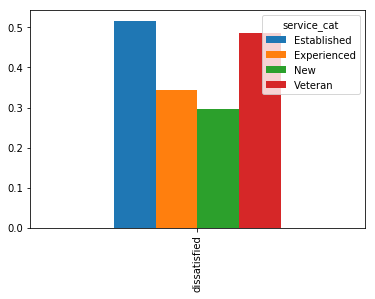

In [222]:
# create a pivot table of average dissatisfied by service category
combined_pivot = pd.pivot_table(combined_updated,values="dissatisfied",columns="service_cat")

# plot out the combined_pivot
combined_pivot.plot(kind='bar')

# Conclusion

From looking at our graph above, it appears those who are "Established" and "Veterans" at the company are the ones to most likely leave due to being dissatisfied with the company. Since these folks tend to hold the most knowledge of hte company from being there the longest, the company is losing out on a major pool of talent. The DETE and TAFE should interview these folks that are currently working at their agencies to brainstorm different ways to keep them engaged and wanting to remain at the company longer.

Well, that's it for now! Thanks for joining, and have a good week.